# Inference from a *sample*

The Central Limit Theorem tells us that (for large $n$) the sampling distribution of the mean is $\mathcal{N}(\mu, \frac{\sigma}{\sqrt{n}})$. 

If we know the parent distribution (as we did for the UK Brexdex distribution), then we know $\mu$ and $\sigma$ and can calculate the sampling distribution of the mean for samples of size $n$ - or indeed we can simulate the sampling distribution as we did above.

* Cases where we know the parent or population distribution include standardized tests such as IQ tests and SATs

However, a more common situation in experimental science is that we just have *just the sample* and no access to the population. Therefore we do not know the parameters $\mu$ and $\sigma$ of the parent population. 

Nonetheless we may be interested in making some *inference* (drawing conclusions) about the population, based on the sample. In particular, we are often interested in establishing a plausible range in which the true parameters $\mu$ and $\sigma$ might fall.

In this section we look at how we can do this.



### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
sns.set_theme(style='white')
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings 
warnings.simplefilter('ignore', category=FutureWarning)

### Example sample

I hypothesise that students taking A-level maths have higher than average IQ scores (as IQ tests are standardized, the population average IQ score is 100).

To test this hypothesis I obtain a sample of IQ scores for 60 students taking A-level maths (*note* - these are made up data!):

In [2]:
mathsIQ_60 = pd.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/data/mathsIQ_60.csv')

I can see that the mean IQ of the students in my sample is indeed slightly over 100, and a histogram suggests there is a positive skew (some students have IQ well above the mean but none have an IQ well below the mean)

mean IQ = 104.6


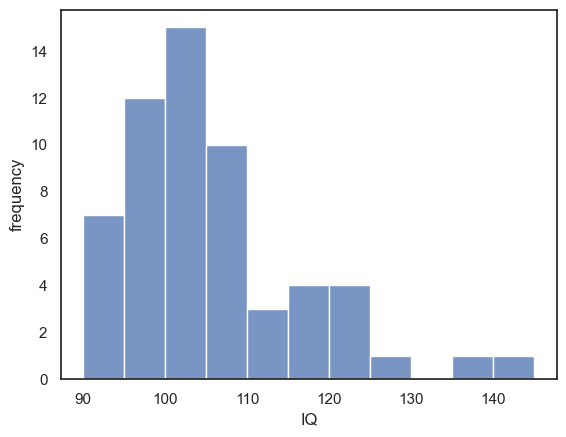

In [3]:
print('mean IQ = ' + str(mathsIQ_60.IQ.mean()))
sns.histplot(mathsIQ_60.IQ, bins=range(90,150,5))
plt.xlabel('IQ')
plt.ylabel('frequency')
plt.show()

... **but** these are just a sample of maths students! Could the high mean IQ be due to random chance, as I happened to select a sample containing several high IQ students? I need to go from what I *know* about the smaple of maths students, to what I can *infer* about the population of maths students

* Note that the population *of maths students* is not necessarily the same as the general population (whose mean IQ is known to be 100 because IQ is a standardized test).

**Imagine I had measured the IQs of the whole population of maths students....**

Then I could find $\mu$ and $\sigma$ (e.g. using `population.mean()` and `population.std()` as I did in the Brexdex examples, when we did have access to the parent distribution.

If I were then to draw many samples of size $n$ from that population, under the central limit theorem, because $n$ is large (>50) the sampling distribution of the mean is a normal distribution

$$ m \sim \mathcal{N}(\mu,  \frac{\sigma^2}{\sqrt{n}}) $$

In fact, but we don't know what $\mu$ or $\sigma$ is. What we are goign to do next is work out **how plausible different values of $\mu$ would be, given our sample mean**
* for now we are just going to assume that $\sigma = s$.

## Likelihood distribution of $\mu$

If we knew $\mu$ and $\sigma$ (**note: we actually don't**) then we could work out the probability of getting the observed sample mean $m=104.6$ as follows:

$$ m \sim \mathcal{N}(\mu, \frac{\sigma^2}{\sqrt{n}}) $$

so the probability of obtaining a sample mean of m (or higher) is 

`stats.norm.cdf(m,mu, sigma/n**0.5)`

... noting that `s/n**0.5` is Python for $\frac{s}{\sqrt{n}}$, the (estimated) standard error of the mean.


Let's assume (**for now**) that $s$ (the sample standard deviation, `mathsIQ_60.IQ.std()`) is a good estimate of the population standard deviation. 

* spoiler - this in fine for $n>50$ when the central limit theorem applies
* later (in the section on the $t$-test) we will meet the $t$ distribution which takes into account uncertainty about $sigma$ when the sample size is small

Then the sampling distribution of the mean would be 

$$ m \sim \mathcal{N}(\mu,  \frac{s^2}{\sqrt{n}}) $$

Then for *any proposed value* of the population mean $\mu$, we can work out the probability of obtaining $m=104.6$ in a sample is given by the normal CDF. for example, what would be the probability of $m=104.6$ if $\mu=102.1$?

`stats.norm.cdf(104.6, 102.1, (s/n**0.5))`

... noting that `s/n**0.5` is Python for $\frac{s}{\sqrt{n}}$, the (estimated) standard error of the mean.

If we repeat this process for all possible values of $\mu$, we end up with plot of how likely our sample mean would be *if each possible value of $\mu$ were true*. This is called the likelihood function and it tells us how likely each possible value of $\mu$ would be to produce our sample mean $m$ 

We can then take a leap and say:

* If I need to guess the true value of $\mu$, my best guess is the one that was most likely to produce the observed sample mean $m$
* Then my best estimate of $\mu$ is in fact $m$
* The likelihood that other values of $\mu$ produced the sample mean $m$ is quantified by the likelihood function.

### Video

Hereis a video explaining how we get the likelihood function by trying lots of different possible or 'candidate' values for the population mean $\mu$, and imagining the sampling distribution of the mean that would arise:

In [4]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/pQVaBpDaAgw?si=Kp3i6i2atH7ksdpK" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

## Plot the likelihood distribution

That last bit probably seemed a bit abstract. But using the computer we can easily plot the likelihood distribution.

First we choose the range of possible values of $\mu$ we want to try:

In [5]:
mu = np.arange(95,115,0.1) 
# this is a list of 'candidate' values for the unknown population mean, mu

for each possible value of $\mu$, work out the probability of the observed sample mean $m$ if $mu$ were true (this is the *likelihood of $\mu$ given $m$*)

then plot them!

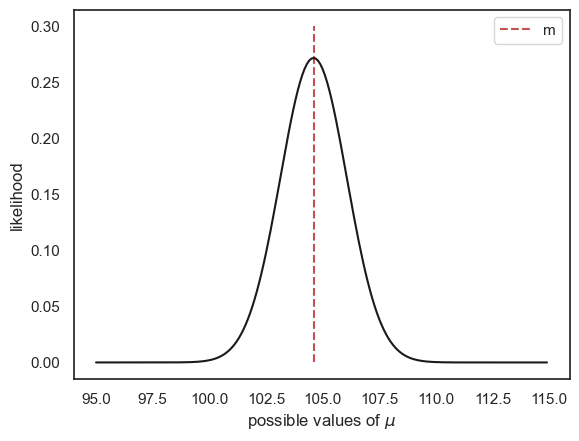

In [6]:
m = mathsIQ_60.IQ.mean() # sample mean
s = mathsIQ_60.IQ.std() # sample s.d.
n = len(mathsIQ_60.IQ) # sample size
SEM = s/(n**0.5) # standard error of the mean

# calculate the probability of the observed sample mean n
# IMAGINING: IF each value of mu WERE TRUE
p = stats.norm.pdf(mu,m,SEM)

# plot the likelihood distribution for mu
plt.plot([m,m],[0,0.3],'r--')
plt.legend('m') # add the sample mean for comparison
plt.plot(mu,p,'k-')
plt.xlabel('possible values of $\mu$')
plt.ylabel('likelihood')

plt.show()

Ta-daa - this plot tells us how probable our sample mean would be given each possible value of $\mu$ and conversely, how $likely$ each true value of $\mu$ is, given the observed data.

* Watch out! There is a real value of $\mu$ and it is a single number, not a distribution
* You can think of the likelihood distribution as a belief distribution
    * By analogy, say I ask you to estimate the height of your statistics lecturer
    * Since you are uncertain, we could plot a graph of how likely you think each value is (unlikely that she is 150cm or 200cm tall, but a range of values, perhaps around 165cm, are considered likely)
    * This does not mean that the actual height of the statistics lecturer is a distribution! She is not taller some days and shorter on others! Her height is a fixed and exact number, it is just your *belief* about her height that is a distribution.

